In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from scipy.stats import wasserstein_distance


In [2]:
personalized_files = ["sc_personalized_dyadic_fair.csv_round_", "sc_personalized_fair.csv_round_",
                      "sc_personalized_node2vec.csv_round_", "sc_personalized_fairwalk.csv_round_",
                      "sc_personalized_hybrid_node2vec.csv_round_"]


In [3]:
def plot_personalized_dist(dataset, algorithm):
    distribution_distance = list()
    file_prefix = f"sc_personalized_{algorithm}.csv_round_"
    try:
        cat = pd.read_csv(f"{dataset}/out_community.txt", sep=" ", names=["Node", "Cat"], header=0)
    except:
        cat = pd.read_csv(f"{dataset}/out_community.txt", sep="\t", names=["Node", "Cat"], header=0)
    df = pd.read_csv(dataset + "/" + file_prefix + "-1.csv", sep="\t")
    fair_ratio = pd.read_csv("books/sc_personalized_fairwalk.csv_round_-1.csv", sep="\t")["Red Personalized Pagerank"].mean()
    df = df.merge(cat, how="inner", on="Node")
    df["round"] = -1
    fair_ratio = pd.read_csv("books/sc_personalized_fairwalk.csv_round_-1.csv", sep="\t")["Red Personalized Pagerank"].mean()
    temp_red = df.loc[df["Cat"] == 1]["Red Personalized Pagerank"]
    temp_blue = df.loc[df["Cat"] == 0]["Red Personalized Pagerank"]
    distribution_distance.append(wasserstein_distance(temp_red, temp_blue))
    for round in range(10):
        temp_df = pd.read_csv(dataset + "/" + file_prefix + f"{round}.csv", sep="\t")
        temp_df = temp_df.merge(cat, how="inner", on="Node")
        temp_red = temp_df.loc[temp_df["Cat"] == 1]["Red Personalized Pagerank"]
        temp_blue = temp_df.loc[temp_df["Cat"] == 0]["Red Personalized Pagerank"]
        distribution_distance.append(wasserstein_distance(temp_red, temp_blue))
        temp_df["round"] = round
        df = df.append(temp_df)
    fig = plt.figure(figsize=(15, 8))
    fig.suptitle(f"Dataset: {dataset} | Algorithm: {algorithm}")
    sns.violinplot(x="round", y="Red Personalized Pagerank", hue="Cat", data=df, split=True)
    
    return distribution_distance


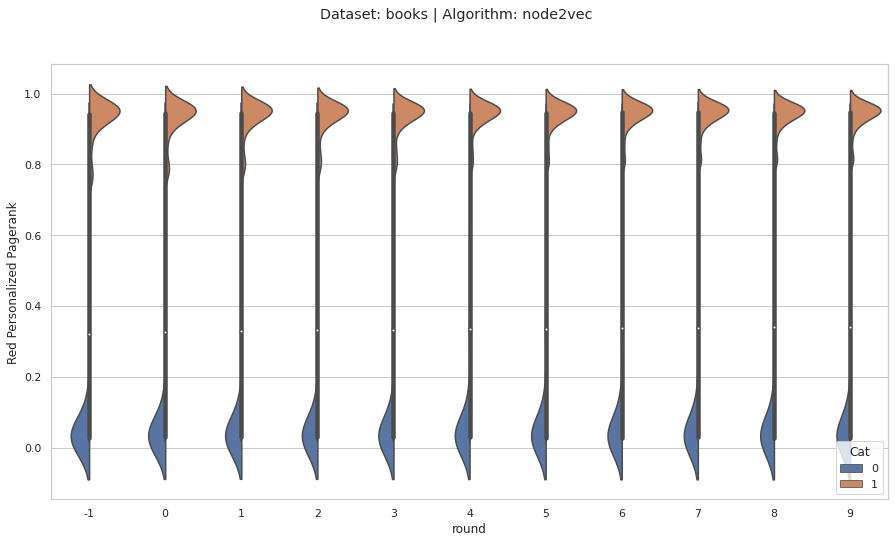

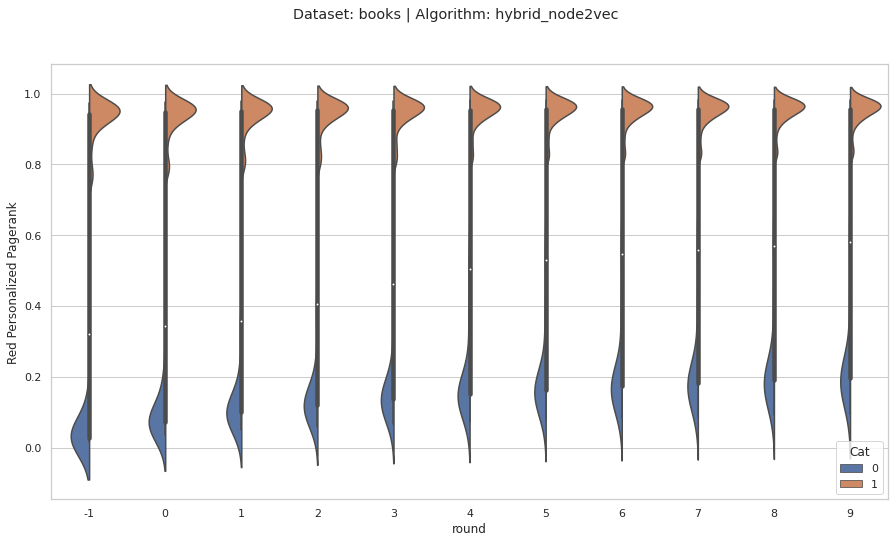

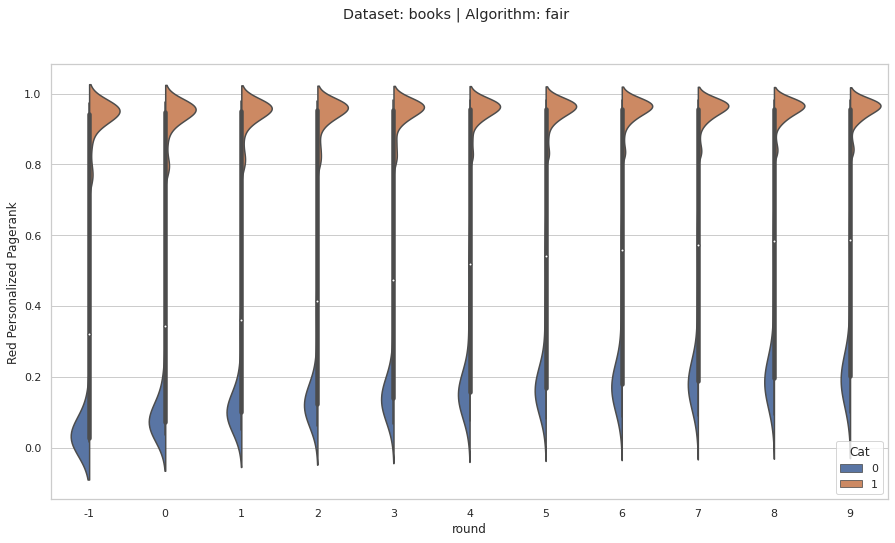

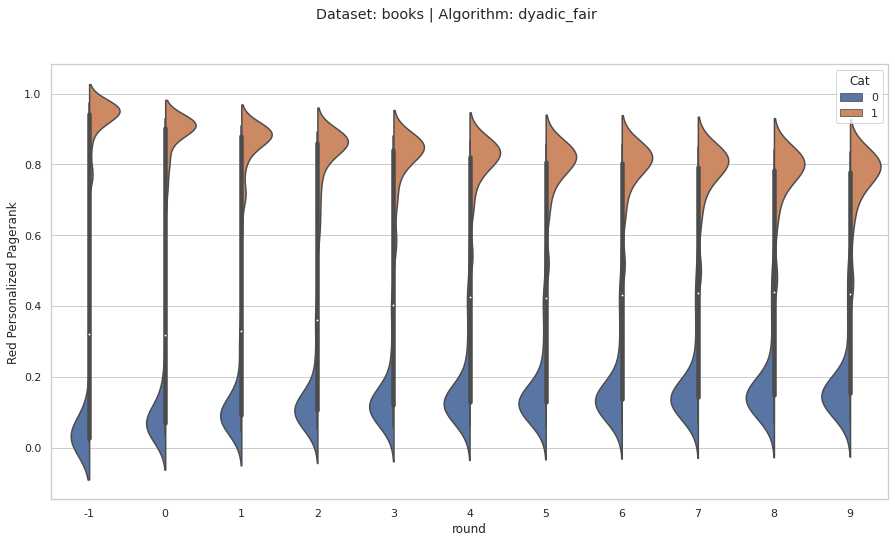

In [4]:
dataset="books"
dist_dist = dict()
dist_dist["node2vec"] = plot_personalized_dist(dataset, "node2vec")
dist_dist["hybrid_node2vec"] = plot_personalized_dist(dataset, "hybrid_node2vec")
dist_dist["fair"] = plot_personalized_dist(dataset, "fair")
dist_dist["dyadic_fair"] = plot_personalized_dist(dataset, "dyadic_fair")
dist_dist = pd.DataFrame.from_dict(dist_dist)

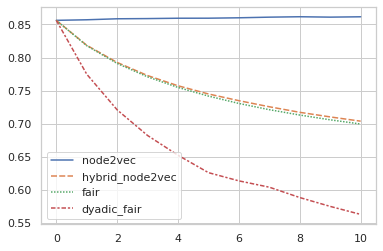

In [5]:
sns.lineplot(data = dist_dist)

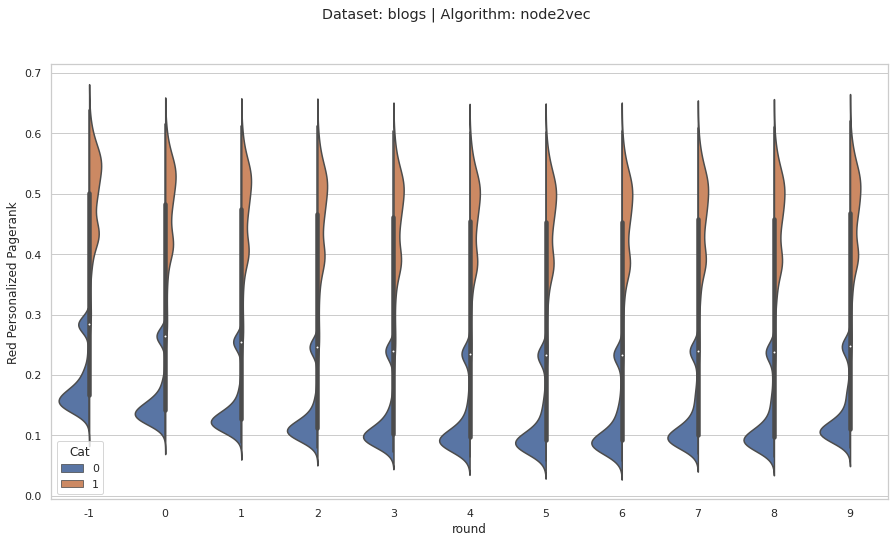

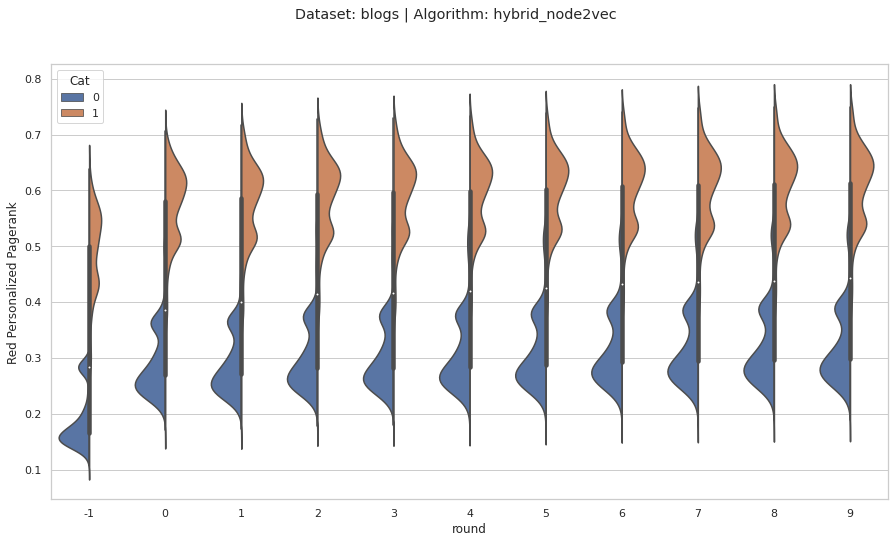

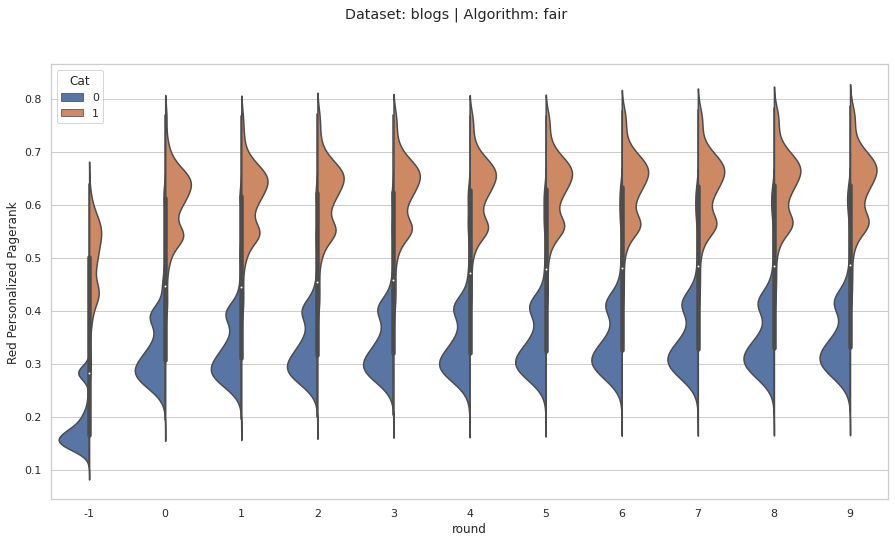

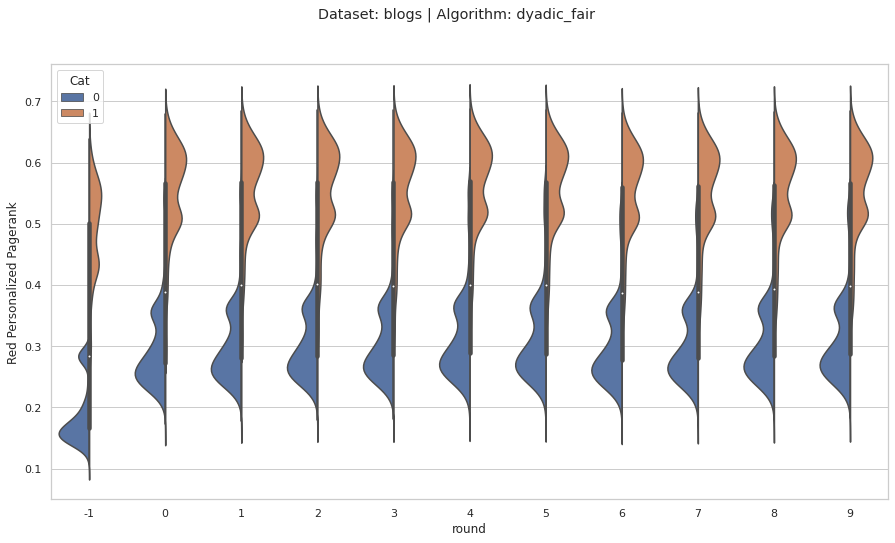

In [6]:
dataset="blogs"
dist_dist = dict()
dist_dist["node2vec"] = plot_personalized_dist(dataset, "node2vec")
dist_dist["hybrid_node2vec"] = plot_personalized_dist(dataset, "hybrid_node2vec")
dist_dist["fair"] = plot_personalized_dist(dataset, "fair")
dist_dist["dyadic_fair"] = plot_personalized_dist(dataset, "dyadic_fair")
dist_dist = pd.DataFrame.from_dict(dist_dist)


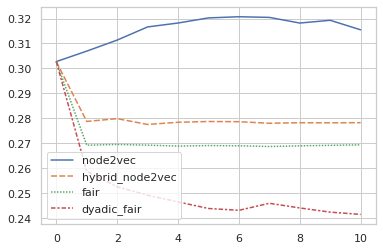

In [7]:
sns.lineplot(data = dist_dist)

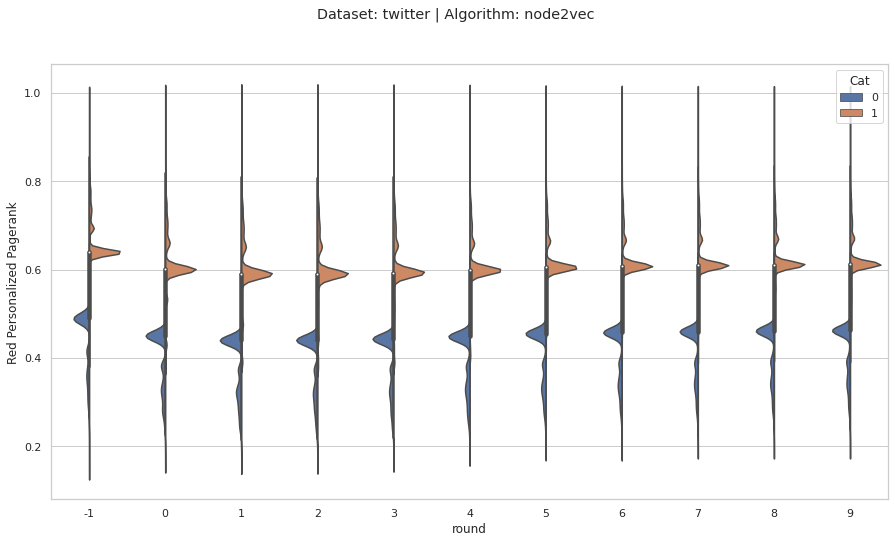

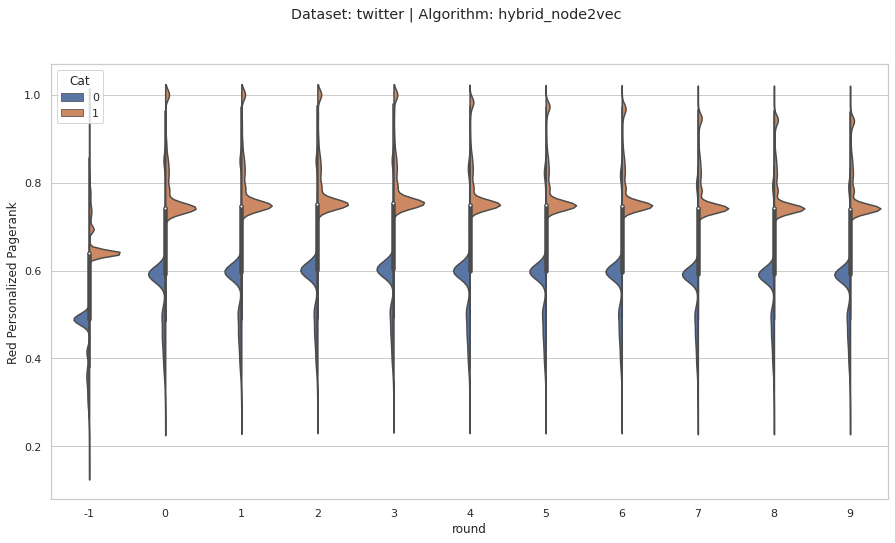

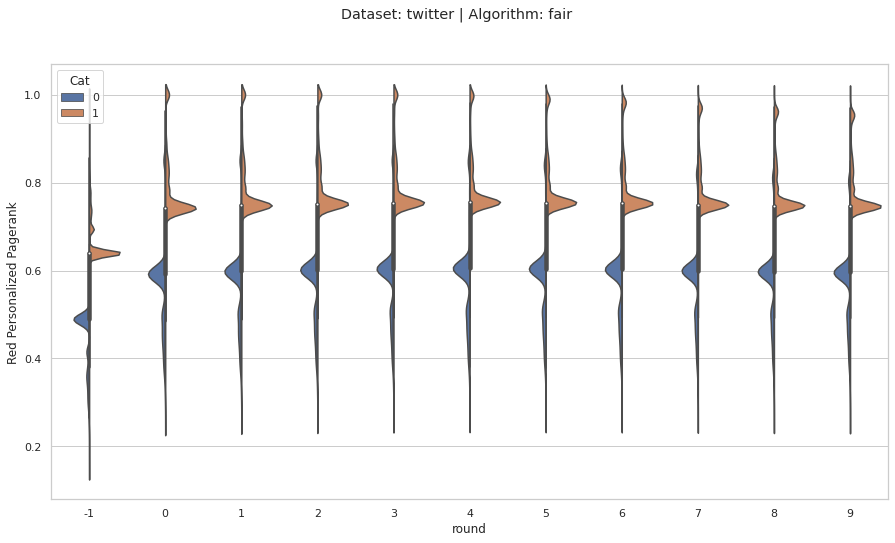

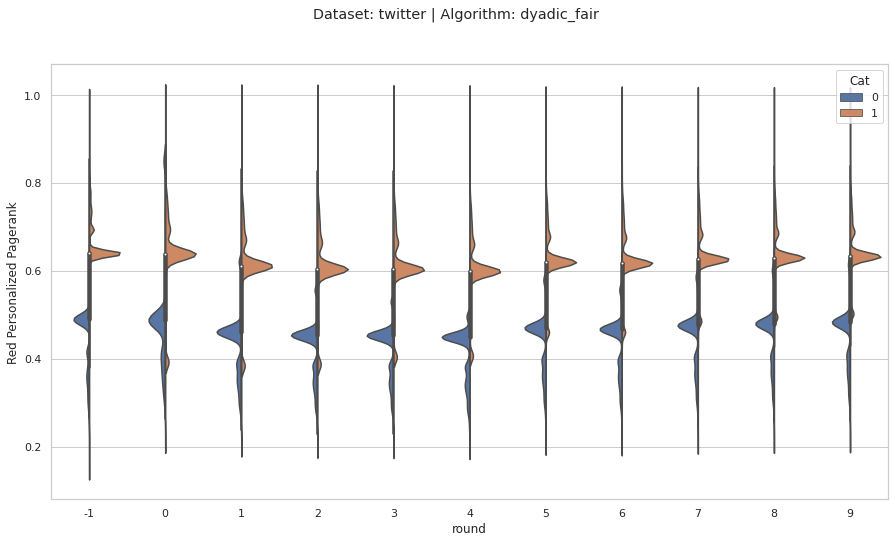

In [8]:
dataset="twitter"
dist_dist = dict()
dist_dist["node2vec"] = plot_personalized_dist(dataset, "node2vec")
dist_dist["hybrid_node2vec"] = plot_personalized_dist(dataset, "hybrid_node2vec")
dist_dist["fair"] = plot_personalized_dist(dataset, "fair")
dist_dist["dyadic_fair"] = plot_personalized_dist(dataset, "dyadic_fair")
dist_dist = pd.DataFrame.from_dict(dist_dist)

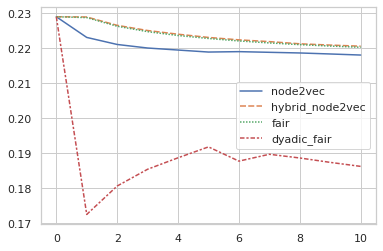

In [9]:
sns.lineplot(data = dist_dist)

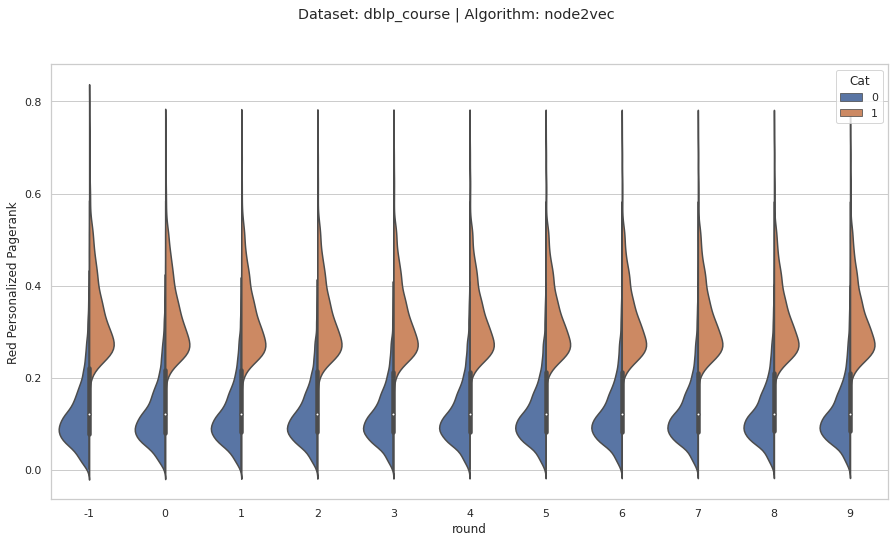

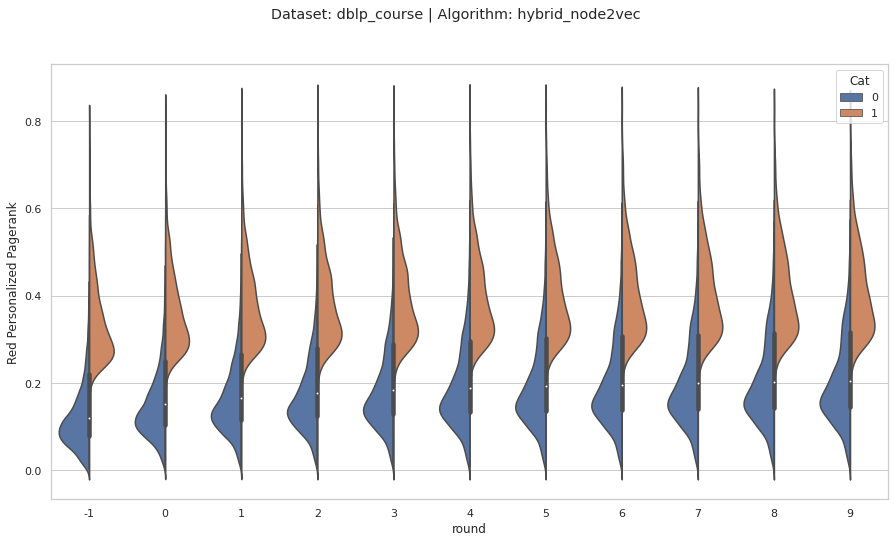

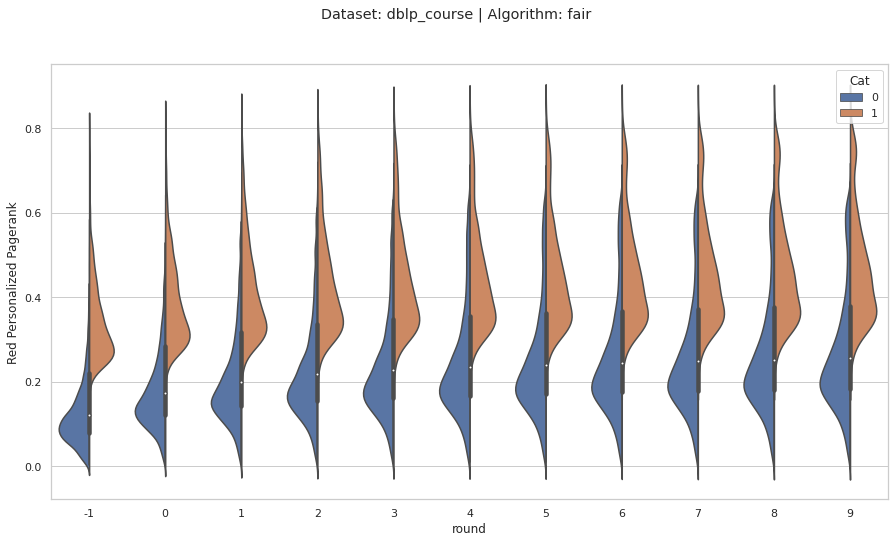

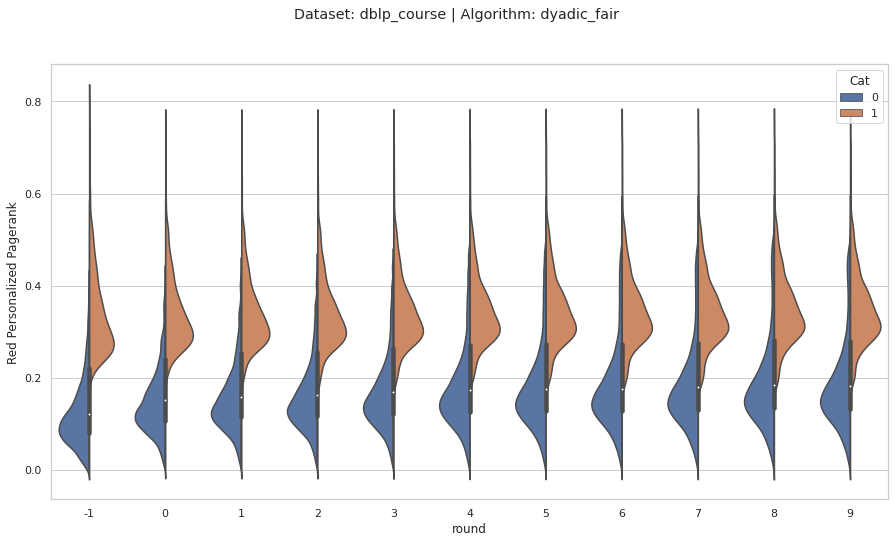

In [10]:
dataset="dblp_course"
dist_dist = dict()
dist_dist["node2vec"] = plot_personalized_dist(dataset, "node2vec")
dist_dist["hybrid_node2vec"] = plot_personalized_dist(dataset, "hybrid_node2vec")
dist_dist["fair"] = plot_personalized_dist(dataset, "fair")
dist_dist["dyadic_fair"] = plot_personalized_dist(dataset, "dyadic_fair")
dist_dist = pd.DataFrame.from_dict(dist_dist)

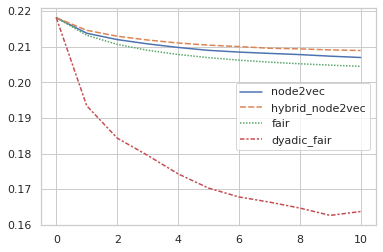

In [11]:
sns.lineplot(data = dist_dist)